# Eval 
Simple Eval jupyter notebook to make simple Eval pipelines and visualizations

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

from utils.config import PROCESSED_TRAIN_PATH, MODEL_PATH, PROCESSED_TRAIN_PATH_TARGET, TRAIN_PATH, TEST_PATH, PROCESSED_TEST_PATH, PREPROCESSOR_PATH, HOLDOUT_PATH


In [2]:
import pandas as pd
import numpy as np
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path
import xgboost as xgb


In [3]:
# Load holdout data for eval 
from joblib import load
# Load the holdout
[X_hldout, y_hldout] = load(HOLDOUT_PATH)

# Load xgb_model
model = load(MODEL_PATH)

In [4]:
print(X_hldout.shape)  # Assert shapes 
print(y_hldout.shape)

(120, 16)
(120, 1)


In [5]:
# Predict
y_pred = model.predict(X_hldout)

# Compute metrics
mae = mean_absolute_error(y_hldout, y_pred)
mse = mean_squared_error(y_hldout, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_hldout, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")


MAE: 21124.2773
MSE: 1101962880.0000
RMSE: 33195.8262
R^2: 0.8517


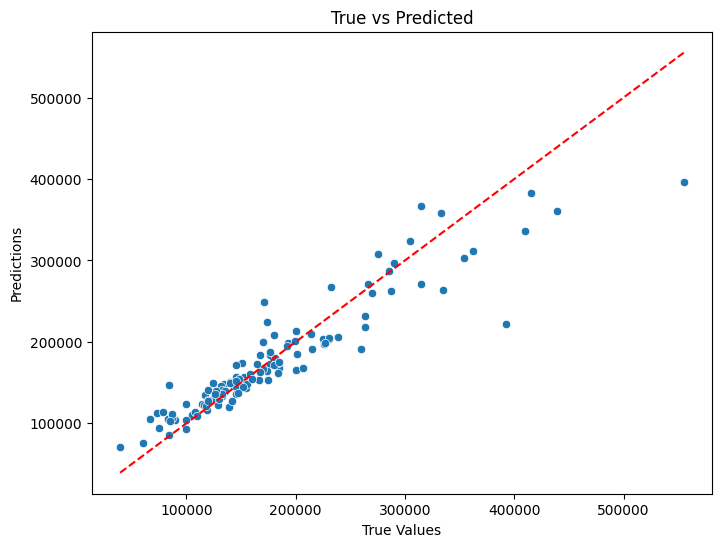

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_hldout.values.flatten(), y=y_pred)
plt.plot([y_hldout.min(), y_hldout.max()], [y_hldout.min(), y_hldout.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
# Save the figure temporarily
plt_path = r"D:\personalProjects\house_price_prediction_e2e\figures\truevpred.png"
plt.savefig(plt_path)
plt.show()
plt.close()  # close to free memory

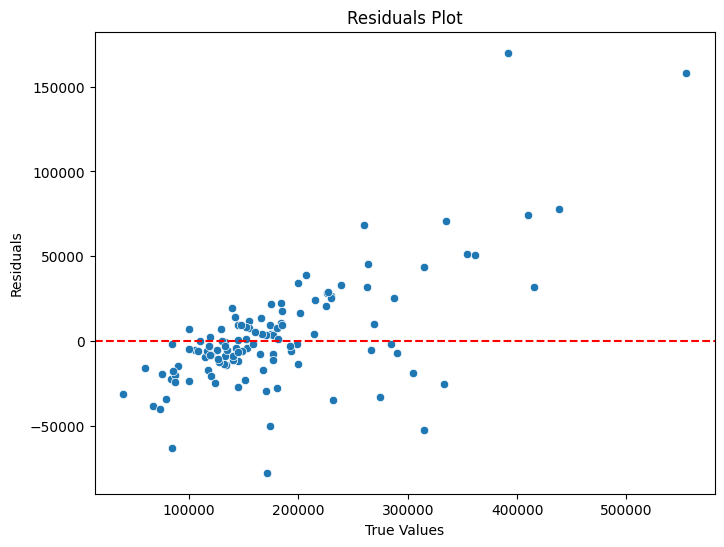

In [13]:
FIGURES_DIR = Path(r"D:\personalProjects\house_price_prediction_e2e\figures")

residuals = y_hldout.values.flatten() - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_hldout.values.flatten(), y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt_path = FIGURES_DIR / "residuals.png"
plt.savefig(plt_path)
plt.show()

plt.close()


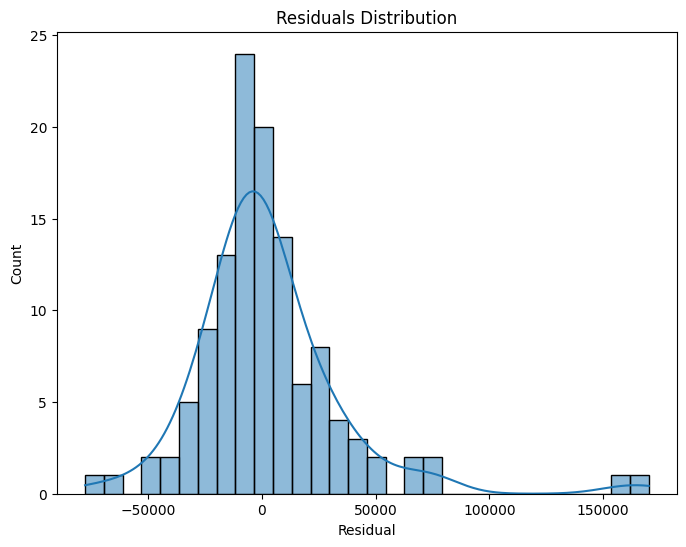

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residual')
plt.title('Residuals Distribution')
plt_path = FIGURES_DIR / "residuals_hist.png"
plt.savefig(plt_path)
plt.show()

plt.close()


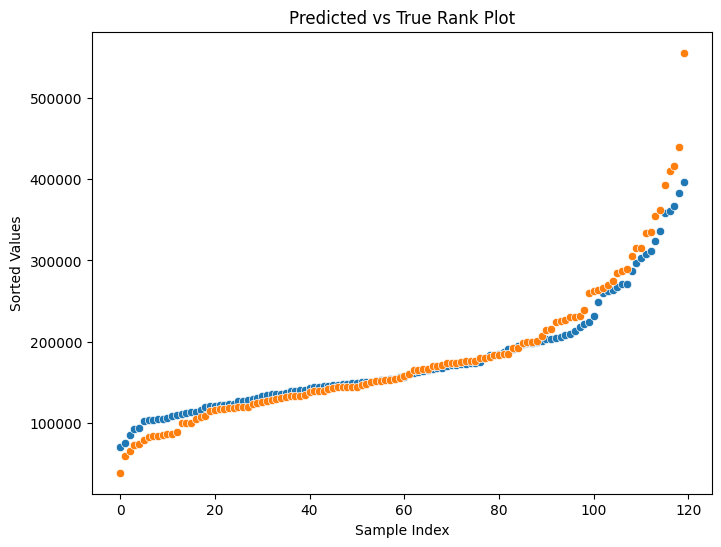

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.arange(len(y_pred)), y=np.sort(y_pred))
sns.scatterplot(x=np.arange(len(y_hldout)), y=np.sort(y_hldout.values.flatten()))
plt.xlabel('Sample Index')
plt.ylabel('Sorted Values')
plt.title('Predicted vs True Rank Plot')
plt_path = FIGURES_DIR / "pred_vs_rank.png"
plt.savefig(plt_path)
plt.show()

plt.close()
